In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification


In [19]:
data = pd.read_csv(r"E:\Training\Teknosoft\Spam Email Dataset\spam.csv", encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [20]:
print("Columns:", data.columns)

Columns: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [21]:
# Drop the extra columns
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

# Rename the remaining columns
data.columns = ['label', 'text']
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [26]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [30]:
# Preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    
    # Remove non-word characters
    text = re.sub(r'\W', ' ', text) 
    
    # Tokenize
    tokens = word_tokenize(text) 
    
    # Remove stop words and perform stemming
    tokens = [stemmer.stem(word.lower()) for word in tokens if word.lower() not in stop_words]
    
    return ' '.join(tokens)

data['processed_text'] = data['text'].apply(preprocess_text)
data

,label,text,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u u å 750 pound prize 2...
5568,ham,Will Ì_ b going to esplanade fr home?,ì_ b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,ham,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [67]:
# Feature Engineering
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['processed_text'])
y = data['label']

In [68]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Initialize classifiers
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(kernel='linear'),
    "Logistic Regression": LogisticRegression()
}

# Train and evaluate each classifier
results = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label='spam')
    recall = recall_score(y_test, predictions, pos_label='spam')
    f1 = f1_score(y_test, predictions, pos_label='spam')
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Print results
print("Comparison of Classification Models:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

Comparison of Classification Models:

Naive Bayes:
Accuracy: 0.9668161434977578
Precision: 1.0
Recall: 0.7533333333333333
F1 Score: 0.8593155893536121

Support Vector Machine:
Accuracy: 0.9757847533632287
Precision: 0.9767441860465116
Recall: 0.84
F1 Score: 0.9032258064516129

Logistic Regression:
Accuracy: 0.9461883408071748
Precision: 0.9591836734693877
Recall: 0.6266666666666667
F1 Score: 0.7580645161290323


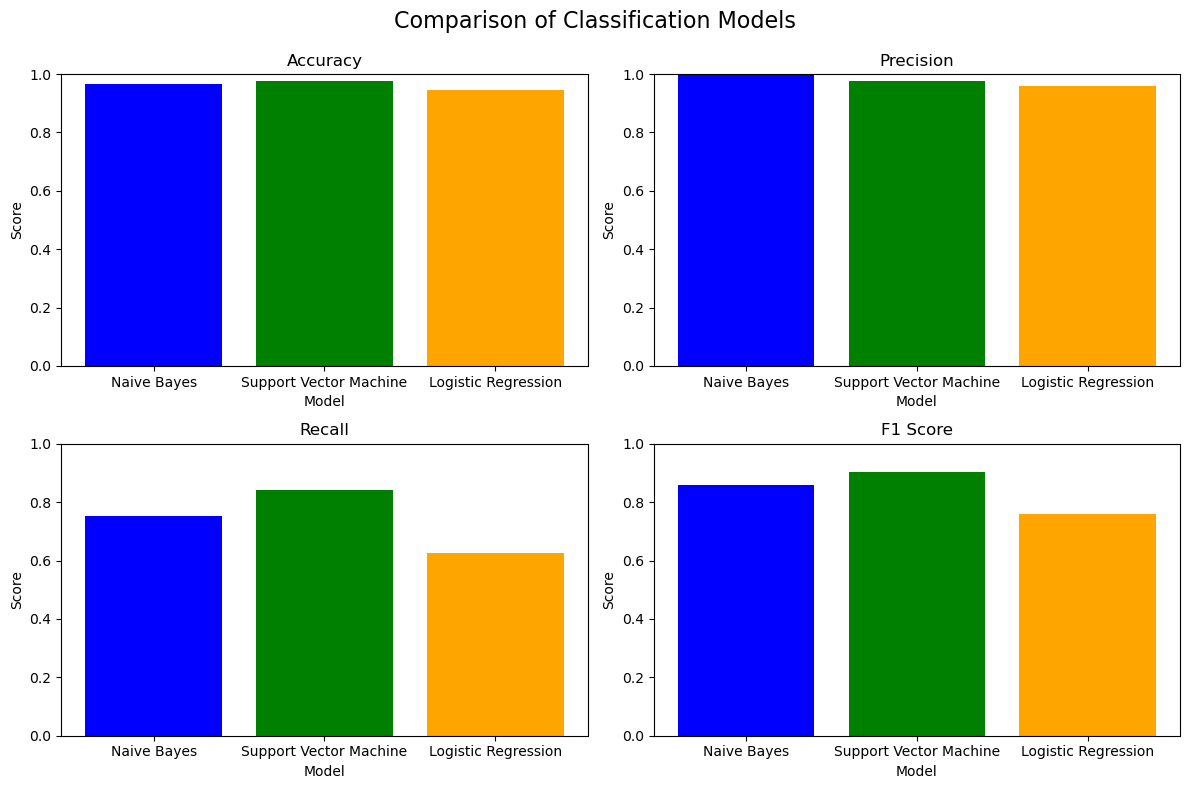

In [88]:
# Define model names and metrics
model_names = list(results.keys())
metrics = list(results[model_names[0]].keys())

# Extract metric values for each model
metric_values = {metric: [results[model][metric] for model in model_names] for metric in metrics}

# Set up figure and axes
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Comparison of Classification Models', fontsize=16)

# Plot each metric
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # Plot bar chart for the metric
    ax.bar(model_names, metric_values[metric], color=['blue', 'green', 'orange'])
    ax.set_title(metric)
    ax.set_ylabel('Score')
    ax.set_xlabel('Model')
    ax.set_ylim(0, 1)  # Setting y-axis limit to 1 for scores
    
# Adjust layout and display the plot
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [72]:
# Input new data (using all data from the dataset)
new_data = data['text']

# Preprocess the input data
preprocessed_data = [preprocess_input(text) for text in new_data]

# Transform preprocessed input data using TF-IDF vectorizer
X_new = tfidf_vectorizer.transform(preprocessed_data)

# Predict labels for input data using each classifier
predictions = {}
for name, classifier in classifiers.items():
    predictions[name] = classifier.predict(X_new)

# Print predictions
for name, preds in predictions.items():
    print(f"Predictions using {name}: {preds}")


Predictions using Naive Bayes: ['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']
Predictions using Support Vector Machine: ['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']
Predictions using Logistic Regression: ['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


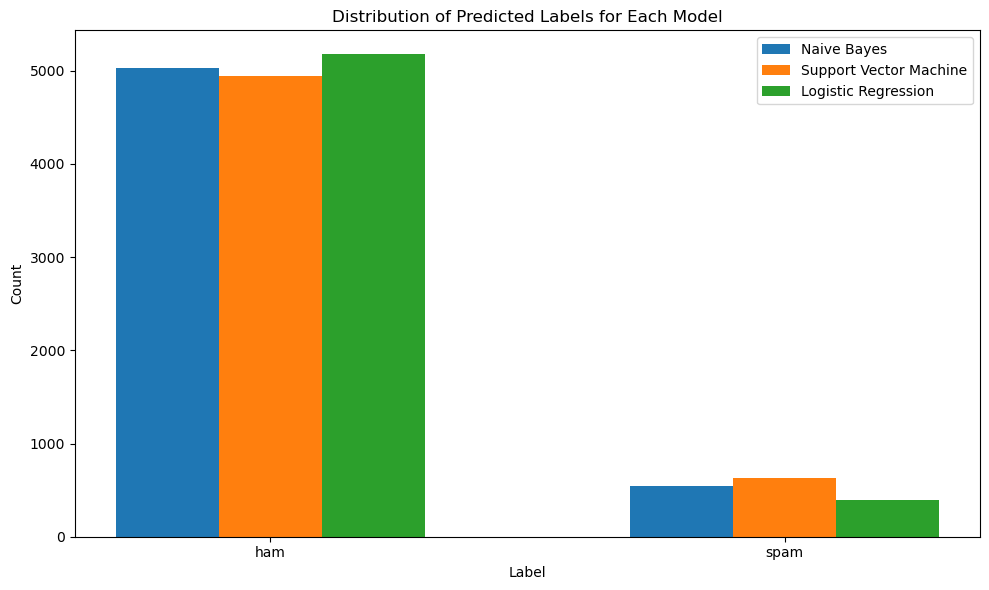

In [73]:
# Get unique labels
unique_labels = np.unique(np.concatenate(list(predictions.values())))

# Count the number of predictions for each label and each model
model_predictions_counts = {name: [np.sum(preds == label) for label in unique_labels] for name, preds in predictions.items()}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(unique_labels))

for i, (model, counts) in enumerate(model_predictions_counts.items()):
    ax.bar(index + i * bar_width, counts, bar_width, label=model)

ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('Distribution of Predicted Labels for Each Model')
ax.set_xticks(index + bar_width * (len(predictions) - 1) / 2)
ax.set_xticklabels(unique_labels)
ax.legend()

plt.tight_layout()
plt.show()